In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns 
df_locations = pd.read_csv("locations.csv",sep = ',') 
df_trainListing = pd.read_csv("trainListings.csv",sep = ',', error_bad_lines=False,low_memory = False)
df_trainMatchedListing = pd.read_csv("trainMatchedListingsmodify.csv")
#df = pd.read_csv("/path/foo.csv", delimiter=';', skiprows=0, low_memory=False)

<ipython-input-1-735e7430f285>:6: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df_trainListing = pd.read_csv("trainListings.csv",sep = ',', error_bad_lines=False,low_memory = False)
b'Skipping line 71425: expected 18 fields, saw 20\nSkipping line 71499: expected 18 fields, saw 46\nSkipping line 71692: expected 18 fields, saw 25\nSkipping line 71968: expected 18 fields, saw 20\nSkipping line 82992: expected 18 fields, saw 24\n'


# CLEANING AND DATA EXPLORATION

#### Check type and null values of the dataframe

In [2]:
print(df_trainListing.isnull().sum())

id                 0
sourceId           2
locationId         7
typeId             2
price           6176
rooms          74561
bedrooms       12843
bathrooms      14823
totalArea      26340
livingArea     52127
plotArea       38794
terraceArea    65921
title           4306
description     2863
features       40720
latitude       67127
longitude      67357
thumbnails         4
dtype: int64


In [3]:
df_trainListing.isna().any(axis=0)

id             False
sourceId        True
locationId      True
typeId          True
price           True
rooms           True
bedrooms        True
bathrooms       True
totalArea       True
livingArea      True
plotArea        True
terraceArea     True
title           True
description     True
features        True
latitude        True
longitude       True
thumbnails      True
dtype: bool

In [4]:
df_trainListing.dtypes

id              object
sourceId       float64
locationId     float64
typeId         float64
price           object
rooms          float64
bedrooms       float64
bathrooms      float64
totalArea      float64
livingArea     float64
plotArea       float64
terraceArea    float64
title           object
description     object
features        object
latitude       float64
longitude      float64
thumbnails      object
dtype: object

In [5]:
df_trainMatchedListing.dtypes

id1       int64
id2       int64
target    int64
dtype: object

##### Rename column id1 to id in order to do a merge with the main dataframe

In [6]:
df_trainMatchedListing.rename(columns = {"id1": "id",}, inplace= True)


In [7]:
df_trainMatchedListing

,id,id2,target
0,1,2,1
1,1,3,1
2,1,4,1
3,1,5,1
4,1,6,1
...,...,...,...
1048570,38170,41558,0
1048571,38170,41559,0
1048572,38171,41556,0
1048573,38171,41557,0


####  Drop Rows with Null valuues, less than 5

In [8]:
df_trainListing = df_trainListing.dropna(subset=['id', 'sourceId','locationId','typeId'], how='any')

In [9]:
df_trainListing

,id,sourceId,locationId,typeId,price,rooms,bedrooms,bathrooms,totalArea,livingArea,plotArea,terraceArea,title,description,features,latitude,longitude,thumbnails
0,1,1.0,84.0,4.0,26500000,20.0,10.0,16.0,4000.0,2800.0,820000.0,NaN,Exquisite manor house amidst the Tramontana va...,"Strength, tradition and serenity around 10,000...","Fireplace, Guest apartment, Air conditioning, ...",NaN,NaN,"1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,1..."
1,2,9.0,84.0,4.0,26500000,NaN,10.0,12.0,3000.0,NaN,1200000.0,NaN,Finca in Puigpunyent (Objektnummer KSV00142),Magnificent Mallorquinian Mansion of XVII cent...,NaN,NaN,NaN,"25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,4..."
2,3,14.0,84.0,12.0,26500000,NaN,10.0,12.0,3000.0,NaN,NaN,NaN,Magnificent Mallorquinian Mansion of XVII cent...,Magnificent Mallorquinian Mansion of XVII cent...,NaN,NaN,NaN,"47,48,49,50,51,52,53,54,55,56,57,58,59"
3,4,37.0,84.0,10.0,26500000,NaN,10.0,12.0,3000.0,NaN,1200000.0,NaN,Magnificent Mallorquinian Mansion of XVII cent...,Magnificent Mallorquinian Mansion of XVII cent...,NaN,NaN,NaN,"60,61,62,63,64,65,66,67,68,69,70,71,72"
4,5,85.0,84.0,10.0,26500000,NaN,10.0,12.0,NaN,NaN,1200000.0,NaN,Mallorquinian Mansion of XVII century on the m...,Magnificent Mallorquinian Mansion of XVII cent...,".,Air Condition,Garden Use,in Mint Condition,P...",NaN,NaN,"73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,8..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83043,105041,10.0,86.0,7.0,315000,NaN,2.0,2.0,140.0,110.0,NaN,30.0,Lovely apartment in the popular area of Son Ar...,Situated only 50 metres away from the verdant ...,NaN,NaN,NaN,"1578415,1578416,1578417,1578418,1578419,157842..."
83044,105042,51.0,109.0,1.0,310000,NaN,3.0,2.0,88.0,88.0,NaN,NaN,Charming apartment in Calo d’en real,Details:\n\t\t\t\t\t\tThe apartment is located...,NaN,38.9213,1.29438,"1578452,1578453,1578454,1578455,1578456,157845..."
83045,105043,325.0,120.0,5.0,310000,NaN,3.0,1.0,85.0,NaN,NaN,NaN,Calo den Real Ria,very nice house at the privae residence of Cal...,Bedroom(s): 3\n\t \t\t\t\t\t\t\n\t\t\tBathroo...,38.9200,1.22719,"1578466,1578467,1578468,1578469,1578470,157847..."
83046,105044,141.0,107.0,1.0,NaN,NaN,4.0,3.0,NaN,120.0,NaN,NaN,Lovely renovated loft style apartment in Ibiza...,NaN,"Separate studio and garden,New installations,C...",NaN,NaN,"1578502,1578503,1578504,1578505,1578506,157850..."


In [10]:
df_trainListing.id.unique()

array(['1', '2', '3', ..., '105043', '105044', '105045'], dtype=object)

In [11]:
# convert column "a" of a DataFrame
df_trainListing['id'] = pd.to_numeric(df_trainListing['id'],errors='coerce')
# converting 'Weight' from float to int
df_trainListing['id'] = df_trainListing['id'].astype(int)

In [12]:
df_trainListing

,id,sourceId,locationId,typeId,price,rooms,bedrooms,bathrooms,totalArea,livingArea,plotArea,terraceArea,title,description,features,latitude,longitude,thumbnails
0,1,1.0,84.0,4.0,26500000,20.0,10.0,16.0,4000.0,2800.0,820000.0,NaN,Exquisite manor house amidst the Tramontana va...,"Strength, tradition and serenity around 10,000...","Fireplace, Guest apartment, Air conditioning, ...",NaN,NaN,"1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,1..."
1,2,9.0,84.0,4.0,26500000,NaN,10.0,12.0,3000.0,NaN,1200000.0,NaN,Finca in Puigpunyent (Objektnummer KSV00142),Magnificent Mallorquinian Mansion of XVII cent...,NaN,NaN,NaN,"25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,4..."
2,3,14.0,84.0,12.0,26500000,NaN,10.0,12.0,3000.0,NaN,NaN,NaN,Magnificent Mallorquinian Mansion of XVII cent...,Magnificent Mallorquinian Mansion of XVII cent...,NaN,NaN,NaN,"47,48,49,50,51,52,53,54,55,56,57,58,59"
3,4,37.0,84.0,10.0,26500000,NaN,10.0,12.0,3000.0,NaN,1200000.0,NaN,Magnificent Mallorquinian Mansion of XVII cent...,Magnificent Mallorquinian Mansion of XVII cent...,NaN,NaN,NaN,"60,61,62,63,64,65,66,67,68,69,70,71,72"
4,5,85.0,84.0,10.0,26500000,NaN,10.0,12.0,NaN,NaN,1200000.0,NaN,Mallorquinian Mansion of XVII century on the m...,Magnificent Mallorquinian Mansion of XVII cent...,".,Air Condition,Garden Use,in Mint Condition,P...",NaN,NaN,"73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,8..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83043,105041,10.0,86.0,7.0,315000,NaN,2.0,2.0,140.0,110.0,NaN,30.0,Lovely apartment in the popular area of Son Ar...,Situated only 50 metres away from the verdant ...,NaN,NaN,NaN,"1578415,1578416,1578417,1578418,1578419,157842..."
83044,105042,51.0,109.0,1.0,310000,NaN,3.0,2.0,88.0,88.0,NaN,NaN,Charming apartment in Calo d’en real,Details:\n\t\t\t\t\t\tThe apartment is located...,NaN,38.9213,1.29438,"1578452,1578453,1578454,1578455,1578456,157845..."
83045,105043,325.0,120.0,5.0,310000,NaN,3.0,1.0,85.0,NaN,NaN,NaN,Calo den Real Ria,very nice house at the privae residence of Cal...,Bedroom(s): 3\n\t \t\t\t\t\t\t\n\t\t\tBathroo...,38.9200,1.22719,"1578466,1578467,1578468,1578469,1578470,157847..."
83046,105044,141.0,107.0,1.0,NaN,NaN,4.0,3.0,NaN,120.0,NaN,NaN,Lovely renovated loft style apartment in Ibiza...,NaN,"Separate studio and garden,New installations,C...",NaN,NaN,"1578502,1578503,1578504,1578505,1578506,157850..."


In [13]:
# pd.merge(df_trainListing ,df_trainMatchedListing,on='id')\
result = pd.merge(df_trainListing, df_trainMatchedListing, how="left", on=["id"])

In [14]:
result

,id,sourceId,locationId,typeId,price,rooms,bedrooms,bathrooms,totalArea,livingArea,plotArea,terraceArea,title,description,features,latitude,longitude,thumbnails,id2,target
0,1,1.0,84.0,4.0,26500000,20.0,10.0,16.0,4000.0,2800.0,820000.0,NaN,Exquisite manor house amidst the Tramontana va...,"Strength, tradition and serenity around 10,000...","Fireplace, Guest apartment, Air conditioning, ...",NaN,NaN,"1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,1...",2.0,1.0
1,1,1.0,84.0,4.0,26500000,20.0,10.0,16.0,4000.0,2800.0,820000.0,NaN,Exquisite manor house amidst the Tramontana va...,"Strength, tradition and serenity around 10,000...","Fireplace, Guest apartment, Air conditioning, ...",NaN,NaN,"1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,1...",3.0,1.0
2,1,1.0,84.0,4.0,26500000,20.0,10.0,16.0,4000.0,2800.0,820000.0,NaN,Exquisite manor house amidst the Tramontana va...,"Strength, tradition and serenity around 10,000...","Fireplace, Guest apartment, Air conditioning, ...",NaN,NaN,"1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,1...",4.0,1.0
3,1,1.0,84.0,4.0,26500000,20.0,10.0,16.0,4000.0,2800.0,820000.0,NaN,Exquisite manor house amidst the Tramontana va...,"Strength, tradition and serenity around 10,000...","Fireplace, Guest apartment, Air conditioning, ...",NaN,NaN,"1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,1...",5.0,1.0
4,1,1.0,84.0,4.0,26500000,20.0,10.0,16.0,4000.0,2800.0,820000.0,NaN,Exquisite manor house amidst the Tramontana va...,"Strength, tradition and serenity around 10,000...","Fireplace, Guest apartment, Air conditioning, ...",NaN,NaN,"1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,1...",6.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1077882,105041,10.0,86.0,7.0,315000,NaN,2.0,2.0,140.0,110.0,NaN,30.0,Lovely apartment in the popular area of Son Ar...,Situated only 50 metres away from the verdant ...,NaN,NaN,NaN,"1578415,1578416,1578417,1578418,1578419,157842...",NaN,NaN
1077883,105042,51.0,109.0,1.0,310000,NaN,3.0,2.0,88.0,88.0,NaN,NaN,Charming apartment in Calo d’en real,Details:\n\t\t\t\t\t\tThe apartment is located...,NaN,38.9213,1.29438,"1578452,1578453,1578454,1578455,1578456,157845...",105043.0,1.0
1077884,105043,325.0,120.0,5.0,310000,NaN,3.0,1.0,85.0,NaN,NaN,NaN,Calo den Real Ria,very nice house at the privae residence of Cal...,Bedroom(s): 3\n\t \t\t\t\t\t\t\n\t\t\tBathroo...,38.9200,1.22719,"1578466,1578467,1578468,1578469,1578470,157847...",105042.0,1.0
1077885,105044,141.0,107.0,1.0,NaN,NaN,4.0,3.0,NaN,120.0,NaN,NaN,Lovely renovated loft style apartment in Ibiza...,NaN,"Separate studio and garden,New installations,C...",NaN,NaN,"1578502,1578503,1578504,1578505,1578506,157850...",105045.0,1.0


In [15]:
len(result.id.unique())

83037

In [16]:
result

,id,sourceId,locationId,typeId,price,rooms,bedrooms,bathrooms,totalArea,livingArea,plotArea,terraceArea,title,description,features,latitude,longitude,thumbnails,id2,target
0,1,1.0,84.0,4.0,26500000,20.0,10.0,16.0,4000.0,2800.0,820000.0,NaN,Exquisite manor house amidst the Tramontana va...,"Strength, tradition and serenity around 10,000...","Fireplace, Guest apartment, Air conditioning, ...",NaN,NaN,"1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,1...",2.0,1.0
1,1,1.0,84.0,4.0,26500000,20.0,10.0,16.0,4000.0,2800.0,820000.0,NaN,Exquisite manor house amidst the Tramontana va...,"Strength, tradition and serenity around 10,000...","Fireplace, Guest apartment, Air conditioning, ...",NaN,NaN,"1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,1...",3.0,1.0
2,1,1.0,84.0,4.0,26500000,20.0,10.0,16.0,4000.0,2800.0,820000.0,NaN,Exquisite manor house amidst the Tramontana va...,"Strength, tradition and serenity around 10,000...","Fireplace, Guest apartment, Air conditioning, ...",NaN,NaN,"1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,1...",4.0,1.0
3,1,1.0,84.0,4.0,26500000,20.0,10.0,16.0,4000.0,2800.0,820000.0,NaN,Exquisite manor house amidst the Tramontana va...,"Strength, tradition and serenity around 10,000...","Fireplace, Guest apartment, Air conditioning, ...",NaN,NaN,"1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,1...",5.0,1.0
4,1,1.0,84.0,4.0,26500000,20.0,10.0,16.0,4000.0,2800.0,820000.0,NaN,Exquisite manor house amidst the Tramontana va...,"Strength, tradition and serenity around 10,000...","Fireplace, Guest apartment, Air conditioning, ...",NaN,NaN,"1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,1...",6.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1077882,105041,10.0,86.0,7.0,315000,NaN,2.0,2.0,140.0,110.0,NaN,30.0,Lovely apartment in the popular area of Son Ar...,Situated only 50 metres away from the verdant ...,NaN,NaN,NaN,"1578415,1578416,1578417,1578418,1578419,157842...",NaN,NaN
1077883,105042,51.0,109.0,1.0,310000,NaN,3.0,2.0,88.0,88.0,NaN,NaN,Charming apartment in Calo d’en real,Details:\n\t\t\t\t\t\tThe apartment is located...,NaN,38.9213,1.29438,"1578452,1578453,1578454,1578455,1578456,157845...",105043.0,1.0
1077884,105043,325.0,120.0,5.0,310000,NaN,3.0,1.0,85.0,NaN,NaN,NaN,Calo den Real Ria,very nice house at the privae residence of Cal...,Bedroom(s): 3\n\t \t\t\t\t\t\t\n\t\t\tBathroo...,38.9200,1.22719,"1578466,1578467,1578468,1578469,1578470,157847...",105042.0,1.0
1077885,105044,141.0,107.0,1.0,NaN,NaN,4.0,3.0,NaN,120.0,NaN,NaN,Lovely renovated loft style apartment in Ibiza...,NaN,"Separate studio and garden,New installations,C...",NaN,NaN,"1578502,1578503,1578504,1578505,1578506,157850...",105045.0,1.0


#### Check result dataframe null values

In [17]:

print(result.isnull().sum())

id                   0
sourceId             0
locationId           0
typeId               0
price           145114
rooms          1015282
bedrooms         42333
bathrooms        74489
totalArea       292766
livingArea      561165
plotArea        436578
terraceArea     819427
title            50658
description      48232
features        595166
latitude        871836
longitude       874285
thumbnails           2
id2              29314
target           29314
dtype: int64


#### Drop columns with a high percentage of null values and drop rows with missing values if the number is low

In [18]:
result.drop(['rooms', 'terraceArea','latitude','longitude'], axis=1,inplace = True)

In [19]:
result.isnull().sum()

id                  0
sourceId            0
locationId          0
typeId              0
price          145114
bedrooms        42333
bathrooms       74489
totalArea      292766
livingArea     561165
plotArea       436578
title           50658
description     48232
features       595166
thumbnails          2
id2             29314
target          29314
dtype: int64

In [20]:
result.dropna(subset=['id2', 'target','thumbnails'], how='any',inplace = True)

In [21]:
result

,id,sourceId,locationId,typeId,price,bedrooms,bathrooms,totalArea,livingArea,plotArea,title,description,features,thumbnails,id2,target
0,1,1.0,84.0,4.0,26500000,10.0,16.0,4000.0,2800.0,820000.0,Exquisite manor house amidst the Tramontana va...,"Strength, tradition and serenity around 10,000...","Fireplace, Guest apartment, Air conditioning, ...","1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,1...",2.0,1.0
1,1,1.0,84.0,4.0,26500000,10.0,16.0,4000.0,2800.0,820000.0,Exquisite manor house amidst the Tramontana va...,"Strength, tradition and serenity around 10,000...","Fireplace, Guest apartment, Air conditioning, ...","1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,1...",3.0,1.0
2,1,1.0,84.0,4.0,26500000,10.0,16.0,4000.0,2800.0,820000.0,Exquisite manor house amidst the Tramontana va...,"Strength, tradition and serenity around 10,000...","Fireplace, Guest apartment, Air conditioning, ...","1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,1...",4.0,1.0
3,1,1.0,84.0,4.0,26500000,10.0,16.0,4000.0,2800.0,820000.0,Exquisite manor house amidst the Tramontana va...,"Strength, tradition and serenity around 10,000...","Fireplace, Guest apartment, Air conditioning, ...","1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,1...",5.0,1.0
4,1,1.0,84.0,4.0,26500000,10.0,16.0,4000.0,2800.0,820000.0,Exquisite manor house amidst the Tramontana va...,"Strength, tradition and serenity around 10,000...","Fireplace, Guest apartment, Air conditioning, ...","1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,1...",6.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1077881,105040,298.0,472.0,10.0,345000,3.0,2.0,123.0,NaN,475.0,Villa for Sale in Binibeca Nou,Villa on ground floor overlooking the sea and ...,Bathroom (s) 2\n ...,"1578210,1578211,1578212,1578213,1578214,157821...",105039.0,1.0
1077883,105042,51.0,109.0,1.0,310000,3.0,2.0,88.0,88.0,NaN,Charming apartment in Calo d’en real,Details:\n\t\t\t\t\t\tThe apartment is located...,NaN,"1578452,1578453,1578454,1578455,1578456,157845...",105043.0,1.0
1077884,105043,325.0,120.0,5.0,310000,3.0,1.0,85.0,NaN,NaN,Calo den Real Ria,very nice house at the privae residence of Cal...,Bedroom(s): 3\n\t \t\t\t\t\t\t\n\t\t\tBathroo...,"1578466,1578467,1578468,1578469,1578470,157847...",105042.0,1.0
1077885,105044,141.0,107.0,1.0,NaN,4.0,3.0,NaN,120.0,NaN,Lovely renovated loft style apartment in Ibiza...,NaN,"Separate studio and garden,New installations,C...","1578502,1578503,1578504,1578505,1578506,157850...",105045.0,1.0


In [22]:
# convert column "a" of a DataFrame
result['price'] = pd.to_numeric(result['price'],errors='coerce')

#result['price'] = result['price'].astype(int)

In [23]:
result.dtypes

id               int32
sourceId       float64
locationId     float64
typeId         float64
price          float64
bedrooms       float64
bathrooms      float64
totalArea      float64
livingArea     float64
plotArea       float64
title           object
description     object
features        object
thumbnails      object
id2            float64
target         float64
dtype: object

# Exploratory Data Analysis and Feature Engineering

In [24]:
# Most likely I will need to apply scaling
result.describe()

,id,sourceId,locationId,typeId,price,bedrooms,bathrooms,totalArea,livingArea,plotArea,id2,target
count,1.048573e+06,1.048573e+06,1.048573e+06,1.048573e+06,9.053510e+05,1.013768e+06,981908.000000,767072.000000,506922.000000,6.272750e+05,1.048573e+06,1.048573e+06
mean,2.519130e+04,6.761161e+01,7.038645e+01,6.601374e+00,1.724763e+06,3.880579e+00,3.277398,335.195555,349.182123,1.154381e+04,2.755727e+04,2.845753e-01
std,2.140421e+04,8.248240e+01,9.617366e+01,3.769998e+00,2.075978e+06,1.708651e+00,1.688185,413.651792,3539.965664,9.771910e+04,2.558537e+04,4.512121e-01
min,1.000000e+00,1.000000e+00,2.000000e+00,1.000000e+00,4.500000e+02,1.000000e+00,1.000000,11.000000,11.000000,2.000000e+01,1.000000e+00,0.000000e+00
25%,1.064100e+04,1.000000e+01,2.100000e+01,4.000000e+00,5.000000e+05,3.000000e+00,2.000000,145.000000,141.000000,9.150000e+02,9.965000e+03,0.000000e+00
50%,2.196900e+04,3.700000e+01,2.800000e+01,9.000000e+00,9.950000e+05,4.000000e+00,3.000000,260.000000,272.000000,1.307000e+03,2.051100e+04,0.000000e+00
75%,3.315700e+04,8.500000e+01,8.500000e+01,1.000000e+01,2.150000e+06,5.000000e+00,4.000000,430.000000,450.000000,2.500000e+03,3.457300e+04,1.000000e+00
max,1.050450e+05,3.670000e+02,8.630000e+02,1.800000e+01,8.000000e+07,1.800000e+02,68.000000,150000.000000,884250.000000,5.181810e+06,1.050450e+05,1.000000e+00


In [25]:
result.bathrooms.unique()

array([16., 12., nan, 22., 15., 13.,  6.,  9., 25.,  7.,  8., 10., 11.,
        5.,  4.,  2.,  3.,  1., 14., 28., 30., 18., 20., 19., 21., 24.,
       31., 38., 23., 40., 68., 45., 52., 41., 51., 61., 35., 36., 29.])

In [26]:
result.totalArea.unique()

array([4000., 3000.,   nan, ..., 1021., 1206., 1163.])

In [27]:
result.bedrooms.unique()

array([ 10.,  nan,  22.,  15.,  25.,  20.,  30.,  13.,   6.,   8.,  14.,
        12.,   9.,   7.,  11.,   5.,   4.,   3.,   2.,   1.,  16.,  18.,
        19.,  21.,  24.,  31.,  26.,  38.,  44.,  40.,  17.,  68.,  29.,
        45.,  55.,  53.,  51.,  41., 180.,  35.,  33.,  23.,  50.,  48.])

C:\Users\ivanh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


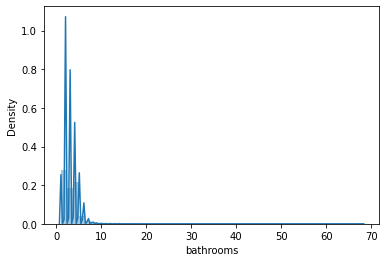

In [28]:
sns.distplot(result['bathrooms']); 

C:\Users\ivanh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


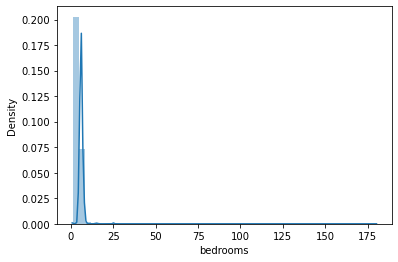

In [29]:
sns.distplot(result['bedrooms']);

C:\Users\ivanh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


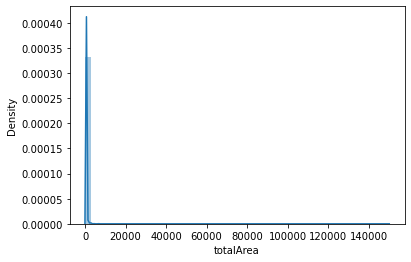

In [30]:
#Right Skewness by looking at the graphic
sns.distplot(result['totalArea']); 

<AxesSubplot:>

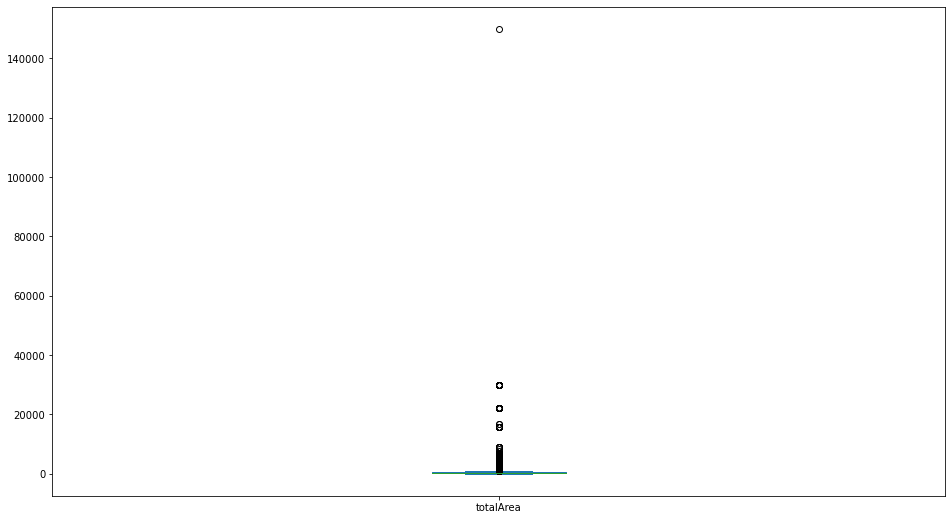

In [31]:
result['totalArea'].plot.box(figsize=(16,9)) 

C:\Users\ivanh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


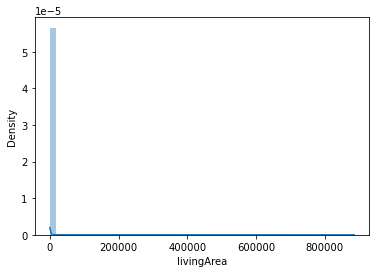

In [32]:
#Right Skewness by looking at the graphic
sns.distplot(result['livingArea']); 

C:\Users\ivanh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


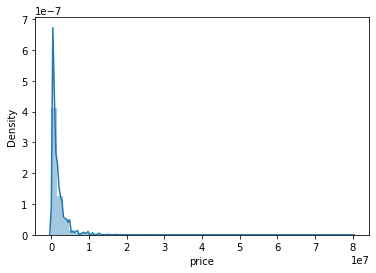

In [33]:
#Right Skewness by looking at the graphic
sns.distplot(result['price']); 

<AxesSubplot:>

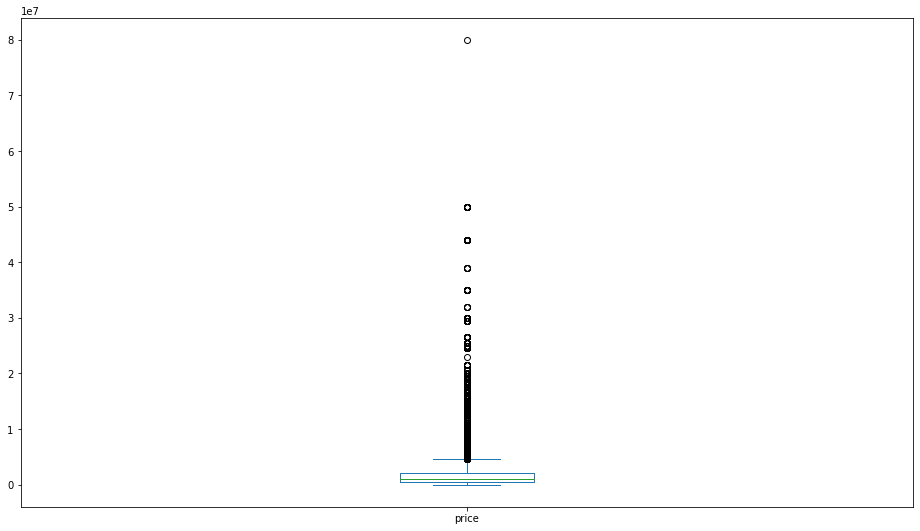

In [34]:
result['price'].plot.box(figsize=(16,9)) 

C:\Users\ivanh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


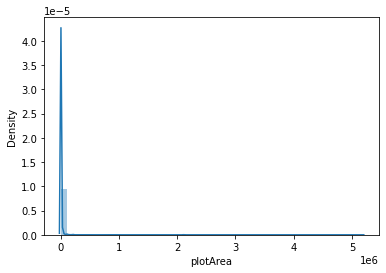

In [35]:
#Right Skewness by looking at the graphic
sns.distplot(result['plotArea']); 

### Drop feature, title , description for now

In [36]:
result.drop(['title', 'description','features'], axis=1,inplace = True)

In [37]:
result

,id,sourceId,locationId,typeId,price,bedrooms,bathrooms,totalArea,livingArea,plotArea,thumbnails,id2,target
0,1,1.0,84.0,4.0,26500000.0,10.0,16.0,4000.0,2800.0,820000.0,"1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,1...",2.0,1.0
1,1,1.0,84.0,4.0,26500000.0,10.0,16.0,4000.0,2800.0,820000.0,"1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,1...",3.0,1.0
2,1,1.0,84.0,4.0,26500000.0,10.0,16.0,4000.0,2800.0,820000.0,"1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,1...",4.0,1.0
3,1,1.0,84.0,4.0,26500000.0,10.0,16.0,4000.0,2800.0,820000.0,"1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,1...",5.0,1.0
4,1,1.0,84.0,4.0,26500000.0,10.0,16.0,4000.0,2800.0,820000.0,"1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,1...",6.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1077881,105040,298.0,472.0,10.0,345000.0,3.0,2.0,123.0,NaN,475.0,"1578210,1578211,1578212,1578213,1578214,157821...",105039.0,1.0
1077883,105042,51.0,109.0,1.0,310000.0,3.0,2.0,88.0,88.0,NaN,"1578452,1578453,1578454,1578455,1578456,157845...",105043.0,1.0
1077884,105043,325.0,120.0,5.0,310000.0,3.0,1.0,85.0,NaN,NaN,"1578466,1578467,1578468,1578469,1578470,157847...",105042.0,1.0
1077885,105044,141.0,107.0,1.0,NaN,4.0,3.0,NaN,120.0,NaN,"1578502,1578503,1578504,1578505,1578506,157850...",105045.0,1.0


### Skewness

In [38]:
# skewness along the index axis
result.skew(axis = 0, skipna = True)

<ipython-input-38-82a4be6dffa3>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  result.skew(axis = 0, skipna = True)


id              1.748068
sourceId        1.747044
locationId      3.051863
typeId         -0.402776
price           4.327582
bedrooms        8.004834
bathrooms       3.939732
totalArea      82.352828
livingArea    245.780010
plotArea       19.469349
id2             1.533797
target          0.954873
dtype: float64

In [39]:
result_log = result.copy(deep=True)

In [40]:
result_log

,id,sourceId,locationId,typeId,price,bedrooms,bathrooms,totalArea,livingArea,plotArea,thumbnails,id2,target
0,1,1.0,84.0,4.0,26500000.0,10.0,16.0,4000.0,2800.0,820000.0,"1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,1...",2.0,1.0
1,1,1.0,84.0,4.0,26500000.0,10.0,16.0,4000.0,2800.0,820000.0,"1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,1...",3.0,1.0
2,1,1.0,84.0,4.0,26500000.0,10.0,16.0,4000.0,2800.0,820000.0,"1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,1...",4.0,1.0
3,1,1.0,84.0,4.0,26500000.0,10.0,16.0,4000.0,2800.0,820000.0,"1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,1...",5.0,1.0
4,1,1.0,84.0,4.0,26500000.0,10.0,16.0,4000.0,2800.0,820000.0,"1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,1...",6.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1077881,105040,298.0,472.0,10.0,345000.0,3.0,2.0,123.0,NaN,475.0,"1578210,1578211,1578212,1578213,1578214,157821...",105039.0,1.0
1077883,105042,51.0,109.0,1.0,310000.0,3.0,2.0,88.0,88.0,NaN,"1578452,1578453,1578454,1578455,1578456,157845...",105043.0,1.0
1077884,105043,325.0,120.0,5.0,310000.0,3.0,1.0,85.0,NaN,NaN,"1578466,1578467,1578468,1578469,1578470,157847...",105042.0,1.0
1077885,105044,141.0,107.0,1.0,NaN,4.0,3.0,NaN,120.0,NaN,"1578502,1578503,1578504,1578505,1578506,157850...",105045.0,1.0


In [41]:
# Log transform multiple columns in dataframe 
#result_log = result_log[['price', 'bedrooms','bathrooms','totalArea','livingArea','plotArea']].apply(lambda x: np.log(x))

In [42]:
# Log transform a single column 
result_log['price'] = np.log(result_log['price'])
result_log['bedrooms'] = np.log(result_log['bedrooms'])
result_log['bathrooms'] = np.log(result_log['bathrooms'])
result_log['totalArea'] = np.log(result_log['totalArea'])
result_log['livingArea'] = np.log(result_log['livingArea'])
result_log['plotArea'] = np.log(result_log['plotArea'])

In [43]:
# skewness along the index axis
result_log.skew(axis = 0, skipna = True)

<ipython-input-43-1cbcecfb21d7>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  result_log.skew(axis = 0, skipna = True)


id            1.748068
sourceId      1.747044
locationId    3.051863
typeId       -0.402776
price         0.023274
bedrooms     -0.426377
bathrooms    -0.195862
totalArea     0.102284
livingArea    0.027363
plotArea      0.972997
id2           1.533797
target        0.954873
dtype: float64

### Graphics after applying log

C:\Users\ivanh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


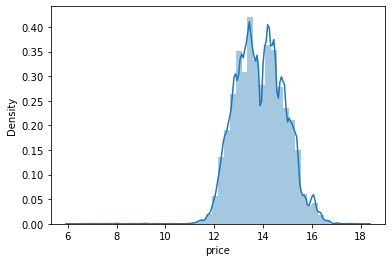

In [44]:
sns.distplot(result_log['price']);

C:\Users\ivanh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


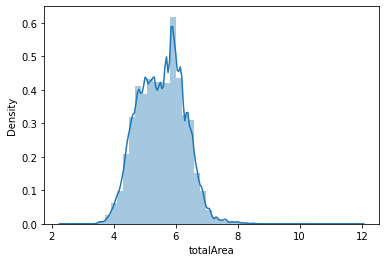

In [45]:
sns.distplot(result_log['totalArea']);

C:\Users\ivanh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


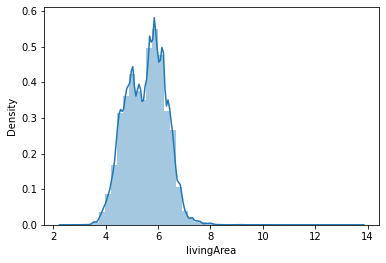

In [46]:
sns.distplot(result_log['livingArea']);

C:\Users\ivanh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


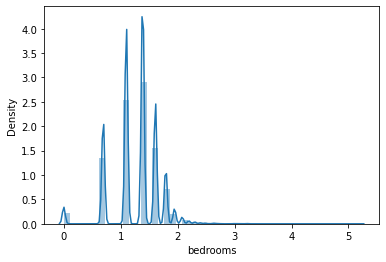

In [47]:
sns.distplot(result_log['bedrooms']);

# Replace Empty data with median or mean for numerical values

In [48]:
result_log.isnull().sum()

id                 0
sourceId           0
locationId         0
typeId             0
price         143222
bedrooms       34805
bathrooms      66665
totalArea     281501
livingArea    541651
plotArea      421298
thumbnails         0
id2                0
target             0
dtype: int64

In [49]:
result_log['price'].fillna(result_log['price'].median(), inplace=True)
result_log['bedrooms'].fillna(result_log['bedrooms'].median(), inplace=True)
result_log['bathrooms'].fillna(result_log['bathrooms'].median(), inplace=True)
result_log['totalArea'].fillna(result_log['totalArea'].median(), inplace=True)
result_log['livingArea'].fillna(result_log['livingArea'].median(), inplace=True)
result_log['plotArea'].fillna(result_log['plotArea'].median(), inplace=True)

In [50]:
result_log.isnull().sum()

id            0
sourceId      0
locationId    0
typeId        0
price         0
bedrooms      0
bathrooms     0
totalArea     0
livingArea    0
plotArea      0
thumbnails    0
id2           0
target        0
dtype: int64

In [51]:
result_log.drop(['thumbnails'], axis=1,inplace = True)

#### Drop id2

In [53]:
result_log.drop(['id2'], axis=1,inplace = True)

In [54]:
result_log

,id,sourceId,locationId,typeId,price,bedrooms,bathrooms,totalArea,livingArea,plotArea,target
0,1,1.0,84.0,4.0,17.092655,2.302585,2.772589,8.294050,7.937375,13.617060,1.0
1,1,1.0,84.0,4.0,17.092655,2.302585,2.772589,8.294050,7.937375,13.617060,1.0
2,1,1.0,84.0,4.0,17.092655,2.302585,2.772589,8.294050,7.937375,13.617060,1.0
3,1,1.0,84.0,4.0,17.092655,2.302585,2.772589,8.294050,7.937375,13.617060,1.0
4,1,1.0,84.0,4.0,17.092655,2.302585,2.772589,8.294050,7.937375,13.617060,1.0
...,...,...,...,...,...,...,...,...,...,...,...
1077881,105040,298.0,472.0,10.0,12.751300,1.098612,0.693147,4.812184,5.605802,6.163315,1.0
1077883,105042,51.0,109.0,1.0,12.644328,1.098612,0.693147,4.477337,4.477337,7.175490,1.0
1077884,105043,325.0,120.0,5.0,12.644328,1.098612,0.000000,4.442651,5.605802,7.175490,1.0
1077885,105044,141.0,107.0,1.0,13.810498,1.386294,1.098612,5.560682,4.787492,7.175490,1.0


# Split Target

In [55]:
X = result_log.drop('target',1) 
y = result_log.target

<ipython-input-55-e4a11dead2df>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = result_log.drop('target',1)


In [56]:
from sklearn.model_selection import train_test_split
X_train,X_test , y_train, y_test = train_test_split(X,y, test_size =0.3)

In [57]:
y.value_counts()

0.0    750175
1.0    298398
Name: target, dtype: int64

# Building a Predictive Model

### Random Forest Classifier

In [95]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 50,max_depth=4)

In [96]:
rfc.fit(X_train, y_train)

C:\Users\ivanh\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_depth=4, max_features='auto', n_estimators=50,
                       random_state=42)

In [97]:
y_pred=rfc.predict(X_test)

In [98]:
from sklearn.metrics import accuracy_score

print("Accuracy for Random Forest on data: ",accuracy_score(y_test,y_pred))

Accuracy for Random Forest on data:  0.8359294533524917


In [99]:
# Making the Confusion Matrix  
from sklearn.metrics import confusion_matrix  
cmrfc = confusion_matrix(y_test, y_pred)  

In [100]:
cmrfc

array([[224273,    437],
       [ 51175,  38687]], dtype=int64)

In [101]:
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, precision_recall_fscore_support

print('Precision                                   : %.3f'%precision_score(y_test, y_pred))
print('Recall                                      : %.3f'%recall_score(y_test, y_pred))
print('F1-Score                                    : %.3f'%f1_score(y_test, y_pred))


Precision                                   : 0.989
Recall                                      : 0.431
F1-Score                                    : 0.600


### Logistic Regression

In [65]:
from sklearn.linear_model import LogisticRegression

In [66]:
# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression()

In [67]:
logisticRegr.fit(X_train, y_train)

C:\Users\ivanh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [68]:
y_pred=logisticRegr.predict(X_test)

In [69]:
# Use score method to get accuracy of model
score = logisticRegr.score(X_test, y_test)
print(score)

0.7939613188713553


In [70]:
from sklearn.metrics import accuracy_score
print("Accuracy for Random logisticregression on data: ",accuracy_score(y_test,y_pred))

Accuracy for Random logisticregression on data:  0.7939613188713553


In [71]:
cmlr = confusion_matrix(y_test, y_pred)  

In [72]:
cmlr

array([[220108,   4602],
       [ 60212,  29650]], dtype=int64)

### Naive Bayes

In [73]:
# training the model on training set
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
 
# making predictions on the testing set
y_pred = gnb.predict(X_test)
 
# comparing actual response values (y_test) with predicted response values (y_pred)
from sklearn import metrics
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

Gaussian Naive Bayes model accuracy(in %): 78.31148353953944


In [74]:
# Making the Confusion Matrix  
from sklearn.metrics import confusion_matrix  
cm = confusion_matrix(y_test, y_pred)  

In [75]:
cm

array([[208514,  16196],
       [ 52030,  37832]], dtype=int64)

# Result Log dataframe to csv

In [81]:
result_log.to_csv('final_train_set.csv',index = False)

# Apply model to the test unseen set

In [85]:
df_test = pd.read_csv("final_test_set.csv",sep = ',') 

In [86]:
df_test

,id,sourceId,locationId,typeId,price,bedrooms,bathrooms,totalArea,livingArea,plotArea
0,186,1,12.0,4,16.300417,1.609438,1.609438,6.684612,6.008813,13.592367
1,187,2,12.0,4,16.300417,1.945910,1.609438,6.684612,5.278115,13.592367
2,188,4,12.0,12,16.300417,0.693147,0.693147,6.551080,5.278115,13.592367
3,189,7,12.0,12,16.300417,0.693147,0.693147,6.684612,5.278115,13.592367
4,190,152,12.0,4,16.300417,1.386294,1.791759,5.379897,7.170120,13.592367
...,...,...,...,...,...,...,...,...,...,...
18112,105006,306,128.0,10,13.815511,0.000000,0.000000,5.379897,5.278115,7.170120
18113,105022,337,367.0,1,12.301383,1.098612,0.693147,4.812184,5.278115,7.170120
18114,105035,244,74.0,5,12.506177,1.098612,0.000000,5.379897,4.828314,6.021023
18115,105036,244,74.0,5,12.506177,1.098612,0.000000,5.379897,4.828314,6.021023


# Predict with Random Forest Classifier

In [102]:
y_pred = rfc.predict(df_test)

In [104]:
y_pred

array([1., 1., 0., ..., 1., 1., 1.])

0          1.0
1          1.0
2          1.0
3          1.0
4          1.0
          ... 
1077881    1.0
1077883    1.0
1077884    1.0
1077885    1.0
1077886    1.0
Name: target, Length: 1048573, dtype: float64